In [1]:
%matplotlib inline
import pandas as pd
from decimal import Decimal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from sklearn.decomposition import PCA
import mglearn as mgl
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

In [2]:
import io
from nbformat import current

with io.open('DanielMunoz_DataPrep_CA2.ipynb' , 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Word Count: {}".format(word_count))

Word Count: 1618


## Analysis of Tesla Market Stock

Tesla was founded in 2003 by a group of engineers who wanted to prove that people didn’t need to compromise to drive electric – that electric vehicles can be better, quicker and more fun to drive than gasoline cars. Today, Tesla builds not only all-electric vehicles but also infinitely scalable clean energy generation and storage products. Tesla believes the faster the world stops relying on fossil fuels and moves towards a zero-emission future, the better(Tesla, 2021).

In [3]:
tesla = pd.read_csv('TSLA_B.csv')

Taking the first approach to understand the dataset is necessary use the function DataFrame.info(), this function shows the quantity of columns and observations per column, including type of observation (Object, Float64, int64). 


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Source     2413 non-null   object 
 2   Open       2416 non-null   float64
 3   High       2416 non-null   float64
 4   Low        2416 non-null   float64
 5   Close      2416 non-null   float64
 6   Adj Close  2384 non-null   float64
 7   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 151.1+ KB


Using the next functions is possible carry on a deeper understanding of the dataset. With head is possible see the way that observations are presented and be able to choose the best way to treat the data, insa() and isnull() allows us check if there are missing or null values and duplicated() analyse values for duplicates of themselves.

In [5]:
tesla.head()

,Date,Source,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,0.70,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30/06/2010,0.40,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01/07/2010,0.10,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02/07/2010,0.20,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06/07/2010,0.60,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
tesla.isna().sum()

Date          0
Source        3
Open          0
High          0
Low           0
Close         0
Adj Close    32
Volume        0
dtype: int64

In [7]:
tesla.isnull().any()

Date         False
Source        True
Open         False
High         False
Low          False
Close        False
Adj Close     True
Volume       False
dtype: bool

In [8]:
tesla_d = tesla[tesla.duplicated()]
print(tesla_d)

Empty DataFrame
Columns: [Date, Source, Open, High, Low, Close, Adj Close, Volume]
Index: []


The Describe function allows us to obtain specific information about the dataset that helps to understand the raw behavior of the data before working on it. 

In [9]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2384.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,187.252651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,118.619900,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.605001,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,213.744995,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.455002,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Now it is verified that there are missing values so it is necessary to modify it since these can produce a misinterpretation of the dataset. Filling in the gaps inside of the columns, in the case of 'Source' is use the vbalue of 0 because is not a variable that will be use but in the case of Adj_Close is a variable that is totally conected with the rest of them, this because is part of Tesla stock price for this reason being Close and Adj_Close similar the missing values where filled in with Close values. 

In [10]:
tesla['Source'].fillna(0, inplace=True)
tesla['Adj Close'].fillna(tesla['Close'], inplace=True)

.shape is another way to verify the quantity of rows and columns the dataset has.

In [11]:
tesla.shape

(2416, 8)

To work the dataset more easily it is necessary to modify the observations, first round the decimals to a manageable value using the round function, then create a new column that compares the market opening and closing values and finally modify the date column with the objective of being able to order the data chronologically. 

In [12]:
tesla['Open_r'] = tesla['Open'].apply(lambda x: round(x,2))
tesla['Low_r'] = tesla['Low'].apply(lambda x: round(x,2))
tesla['Close_r'] = tesla['Close'].apply(lambda x: round(x,2))
tesla['Adj_Close_r'] = tesla['Adj Close'].apply(lambda x: round(x,2))
tesla['High_r'] = tesla['High'].apply(lambda x: round(x,2))
tesla['Close and Open variability'] = tesla['Adj_Close_r']-tesla['Open_r']
tesla['Date'] = pd.to_datetime(tesla['Date'], dayfirst=True)

Having duplicates of multiple columns is not correct, for that reason those variables have to be deleted. The name of the column Volume was modify because Shares is more correlated with stock market. 

In [13]:
tesla_set = tesla.drop(columns=['Open', 'Low', 'Close', 'Adj Close', 'High', 'Source'])
tesla_set = tesla_set.rename(columns={'Volume': 'Shares'})

After perform multiple tasks in  the table, the result can be checked using .head() function.

In [14]:
tesla_set.head()

,Date,Shares,Open_r,Low_r,Close_r,Adj_Close_r,High_r,Close and Open variability
0,2010-06-29,18766300,19.00,17.54,23.89,23.89,25.00,4.89
1,2010-06-30,17187100,25.79,23.30,23.83,23.83,30.42,-1.96
2,2010-07-01,8218800,25.00,20.27,21.96,21.96,25.92,-3.04
3,2010-07-02,5139800,23.00,18.71,19.20,19.20,23.10,-3.80
4,2010-07-06,6866900,20.00,15.83,16.11,16.11,20.00,-3.89


The data must be organized by date in order to follow continuity properly, two columns are added (Month and Year) using the date column as a base in order to have a better understanding of the dataset and to be able to group the data in a way more effective.

In [15]:
tesla_set['Month'] = pd.DatetimeIndex(tesla_set['Date']).month
tesla_set['Month'] = tesla_set['Month'].apply(lambda x: calendar.month_abbr[x])
tesla_set['Year'] = pd.DatetimeIndex(tesla_set['Date']).year
tesla_set = tesla_set.sort_values(by='Date')

In [16]:
tesla_set.head()

,Date,Shares,Open_r,Low_r,Close_r,Adj_Close_r,High_r,Close and Open variability,Month,Year
0,2010-06-29,18766300,19.00,17.54,23.89,23.89,25.00,4.89,Jun,2010
1,2010-06-30,17187100,25.79,23.30,23.83,23.83,30.42,-1.96,Jun,2010
2,2010-07-01,8218800,25.00,20.27,21.96,21.96,25.92,-3.04,Jul,2010
3,2010-07-02,5139800,23.00,18.71,19.20,19.20,23.10,-3.80,Jul,2010
4,2010-07-06,6866900,20.00,15.83,16.11,16.11,20.00,-3.89,Jul,2010


Plotting the Dataset with boxplot, it shows us graphically the groups of numerical data through their quartiles, this in regard to find if the data is skewed and the presence of outliers on it.

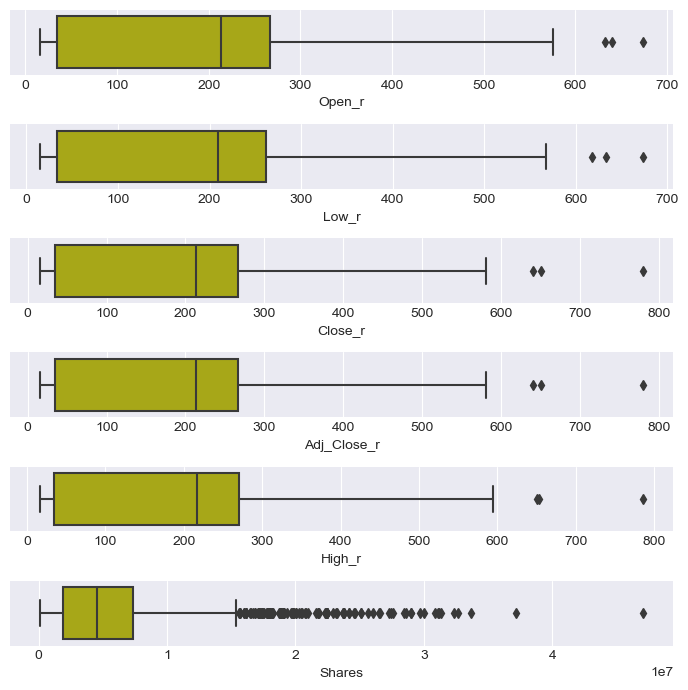

In [17]:
fig, ax = plt.subplots(6,1, dpi=100, figsize=(7,7))

sns.boxplot(x="Open_r", data=tesla_set, color='y', ax=ax[0])
sns.boxplot(x="Low_r", data=tesla_set, color='y',ax=ax[1])
sns.boxplot(x="Close_r", data=tesla_set, color='y',ax=ax[2])
sns.boxplot(x="Adj_Close_r", data=tesla_set, color='y',ax=ax[3])
sns.boxplot(x="High_r", data=tesla_set, color='y',ax=ax[4])
sns.boxplot(x="Shares", data=tesla_set, color='y',ax=ax[5])

plt.tight_layout();

In [18]:
print(tesla_set.skew())

Shares                        2.165242
Open_r                       -0.014380
Low_r                        -0.010357
Close_r                       0.016514
Adj_Close_r                   0.016514
High_r                        0.011923
Close and Open variability    3.124441
Year                         -0.017071
dtype: float64


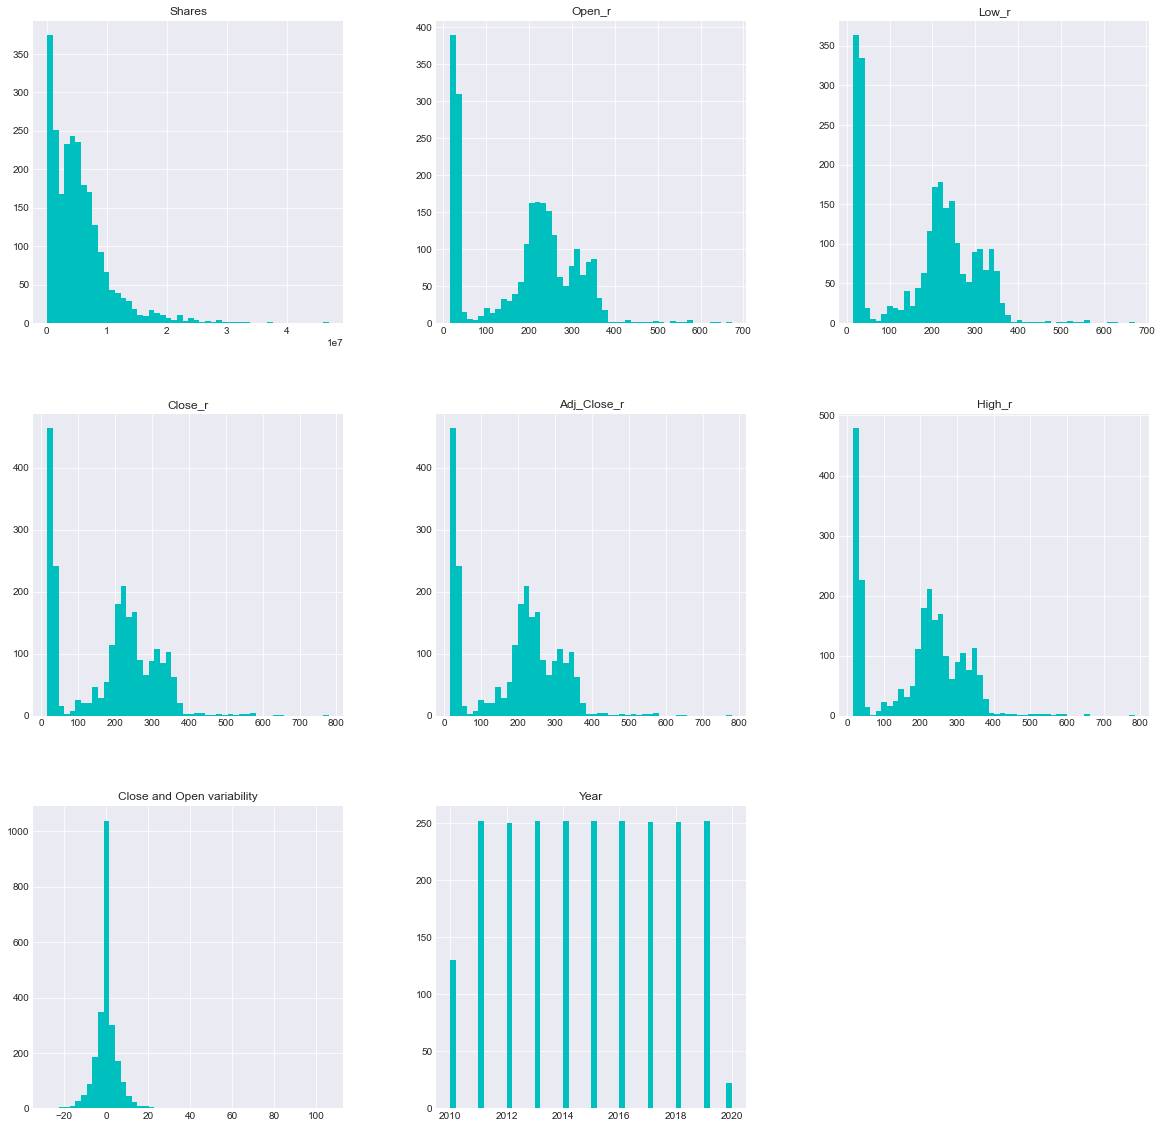

In [19]:
tesla_set.hist(bins=50, figsize=(20,20), color='c');

Analyzing the boxplots graphically, the presence of outliers is clear and the function .skew() shows us that clearly, therefore the data must be filtered to avoid erroneous results due to outliers, the way to perform this is using the following formula (Sharma, 2018). 

In [20]:
Q1 = tesla_set.quantile(0.25)
Q3 = tesla_set.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Shares                        5.461875e+06
Open_r                        2.321075e+02
Low_r                         2.285150e+02
Close_r                       2.323750e+02
Adj_Close_r                   2.323750e+02
High_r                        2.360300e+02
Close and Open variability    3.525000e+00
Year                          5.000000e+00
dtype: float64


In order to eliminate the outliers from our dataset, it is necessary to convert the 'Date' variable to a numeric variable because being a datetime variable it is not possible. 

In [21]:
tesla_set['Date'] = pd.to_numeric(tesla_set['Date'])

Using the following function(Sharma, 2018), the presence of outliers can be visually analyzed, this being true, another function must be applied to eliminate these values from the dataset to be analyzed and it is possible to demonstrate this by applying the .shape function. 

In [22]:
(tesla_set < (Q1 - 1.5 * IQR)) |(tesla_set > (Q3 + 1.5 * IQR))

,Adj_Close_r,Close and Open variability,Close_r,Date,High_r,Low_r,Month,Open_r,Shares,Year
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2411,False,False,False,False,False,False,False,False,False,False
2412,False,False,False,False,False,False,False,False,True,False
2413,True,True,True,False,True,True,False,True,True,False
2414,True,True,True,False,True,True,False,True,True,False


In [23]:
tesla_set = tesla_set[~((tesla_set < (Q1 - 1.5 * IQR)) |(tesla_set > (Q3 + 1.5 * IQR))).any(axis=1)]
tesla_set.shape

(2022, 10)

now the skewness of the data is less dispersed so the analysis should be more accurate.

In [24]:
print(tesla_set.skew())

Date                          0.150269
Shares                        0.917173
Open_r                       -0.004907
Low_r                        -0.002587
Close_r                      -0.004849
Adj_Close_r                  -0.004849
High_r                       -0.008320
Close and Open variability    0.032935
Year                          0.126085
dtype: float64


Plotting the correlation of 'Year' and 'Close and Open variability' is possible to graphically see the curve that is generated when the price of entry and closing of tesla stock varies and its relationship with the quantity of stock.
Here the amount of money that is lost or gained is explained graphically when the closing value is greater or less than the initial value and when the amount of the stock traded varies. 

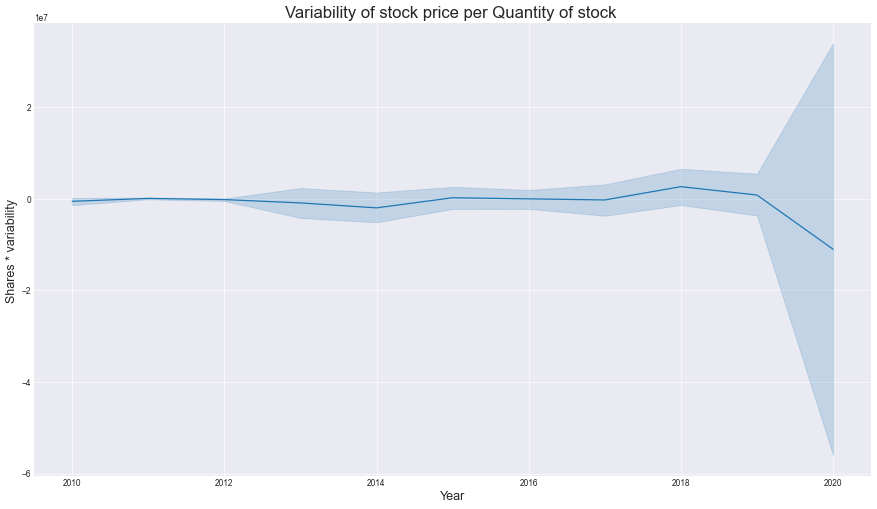

In [25]:
fig, ax = plt.subplots(1,1, dpi=60, figsize=(18,10))
sns.lineplot(x=tesla_set['Year'], y=tesla_set['Close and Open variability']*tesla_set['Shares']);
plt.ylabel("Shares * variability ", size=15)
plt.xlabel("Year", size=15)
plt.title("Variability of stock price per Quantity of stock ", size=20);

In order to find the maximum and minimum values of each variable, the Date column must be modified to date and time again. Having worked with the set, it is now possible to see a dataset to work with, with no outliers or misplaced values.

In [26]:
tesla_set['Date'] = pd.to_datetime(tesla_set['Date'])

In [27]:
tesla_set.head(10)

,Date,Shares,Open_r,Low_r,Close_r,Adj_Close_r,High_r,Close and Open variability,Month,Year
2,2010-07-01,8218800,25.00,20.27,21.96,21.96,25.92,-3.04,Jul,2010
3,2010-07-02,5139800,23.00,18.71,19.20,19.20,23.10,-3.80,Jul,2010
4,2010-07-06,6866900,20.00,15.83,16.11,16.11,20.00,-3.89,Jul,2010
5,2010-07-07,6921700,16.40,14.98,15.80,15.80,16.63,-0.60,Jul,2010
6,2010-07-08,7711400,16.14,15.57,17.46,17.46,17.52,1.32,Jul,2010
7,2010-07-09,4050600,17.58,16.55,17.40,17.40,17.90,-0.18,Jul,2010
8,2010-07-12,2202500,17.95,17.00,17.05,17.05,18.07,-0.90,Jul,2010
9,2010-07-13,2680100,17.39,16.90,18.14,18.14,18.64,0.75,Jul,2010
10,2010-07-14,4195200,17.94,17.76,19.84,19.84,20.15,1.90,Jul,2010
11,2010-07-15,3739800,19.94,19.00,19.89,19.89,21.50,-0.05,Jul,2010


In [28]:
tesla_set.tail(10)

,Date,Shares,Open_r,Low_r,Close_r,Adj_Close_r,High_r,Close and Open variability,Month,Year
2384,2019-12-17,8496800,378.99,375.90,378.99,378.99,385.50,0.00,Dec,2019
2387,2019-12-20,14752700,410.29,400.19,405.59,405.59,413.00,-4.70,Dec,2019
2389,2019-12-24,8054700,418.36,412.69,425.25,425.25,425.47,6.89,Dec,2019
2390,2019-12-26,10633900,427.91,426.35,430.94,430.94,433.48,3.03,Dec,2019
2391,2019-12-27,9945700,435.00,426.11,430.38,430.38,435.31,-4.62,Dec,2019
2394,2020-01-02,9532100,424.50,421.71,430.26,430.26,430.70,5.76,Jan,2020
2400,2020-01-10,12959500,481.79,473.70,478.15,478.15,484.94,-3.64,Jan,2020
2405,2020-01-17,13629100,507.61,503.16,510.50,510.50,515.67,2.89,Jan,2020
2409,2020-01-24,14353600,570.63,554.26,564.82,564.82,573.86,-5.81,Jan,2020
2411,2020-01-28,11788500,568.49,558.08,566.90,566.90,576.81,-1.59,Jan,2020


Using a scatterplot(Holtz, 2018) with the variablers Adj_Close_r and Date the plot shows us the growth curve of stock price per year.

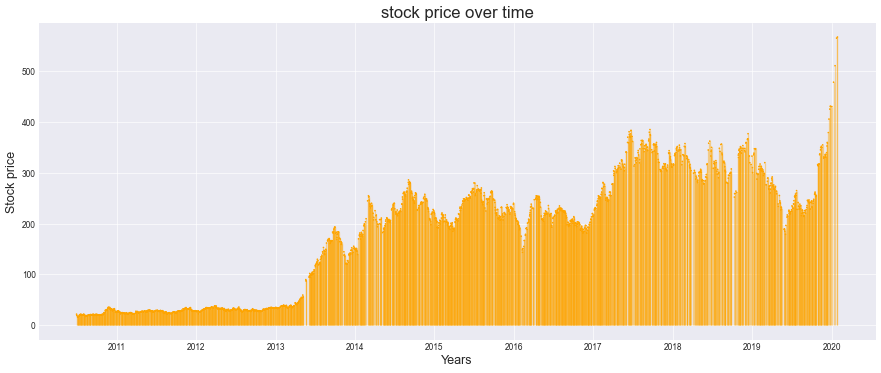

In [29]:
fig, ax = plt.subplots(1,1, dpi=60, figsize=(18,7))
y = tesla_set['Adj_Close_r']
x = tesla_set['Date']
 
my_color = np.where(y>=0, 'orange', 'skyblue')
 
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
plt.ylabel("Stock price", size=15)
plt.xlabel("Years", size=15)
plt.title("stock price over time", size=20)

plt.show()

In the following graph (Holtz, 2018) the comparison between 'Shares' and 'Close and Open variability' give an understanding of the way that stock market behave, when the market close with a higher value is orange and when the market close with a lower value is blue. 

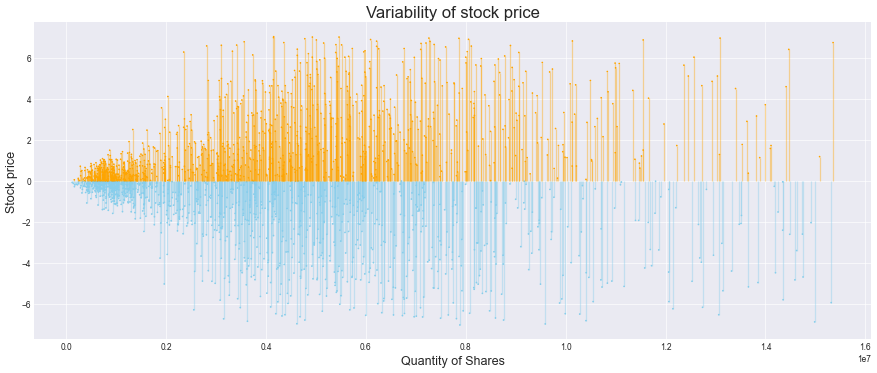

In [30]:
fig, ax = plt.subplots(1,1, dpi=60, figsize=(18,7))
x = tesla_set['Shares']
y = tesla_set['Close and Open variability']
 
my_color = np.where(y>=0, 'orange', 'skyblue')
 
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
plt.ylabel("Stock price", size=15)
plt.xlabel("Quantity of Shares", size=15)
plt.title("Variability of stock price", size=20)

plt.show()

Now verifying do not exist any missing or null value.

In [31]:
tesla_set.isna().sum()

Date                          0
Shares                        0
Open_r                        0
Low_r                         0
Close_r                       0
Adj_Close_r                   0
High_r                        0
Close and Open variability    0
Month                         0
Year                          0
dtype: int64

Now mean and standard deviation do not have a difference as big as before and the minimun value and the maximun value are without outliers.

In [32]:
tesla_set.describe()

,Shares,Open_r,Low_r,Close_r,Adj_Close_r,High_r,Close and Open variability,Year
count,2.022000e+03,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
mean,4.308136e+06,169.085213,166.485584,169.083215,169.083215,171.544174,-0.001998,2014.405539
std,3.190301e+06,115.725691,114.237455,115.768136,115.768136,117.146134,2.755015,2.749608
min,1.185000e+05,16.140000,14.980000,15.800000,15.800000,16.630000,-7.040000,2010.000000
25%,1.423500e+06,32.012500,31.392500,32.100000,32.100000,32.722500,-1.330000,2012.000000
50%,3.836750e+06,202.500000,199.970000,202.965000,202.965000,205.985000,-0.020000,2014.000000
75%,6.145350e+06,252.057500,249.397500,252.480000,252.480000,255.235000,1.280000,2017.000000
max,1.535470e+07,570.630000,558.080000,566.900000,566.900000,576.810000,7.020000,2020.000000


In [33]:
tesla_set.value_counts('Year')

Year
2011    252
2012    250
2015    225
2016    219
2013    214
2014    201
2017    190
2019    187
2018    151
2010    128
2020      5
dtype: int64

Next analysis give maximun and minimun values of each feature.

In [34]:
print(tesla_set[['Date','Shares']][tesla_set.Shares == tesla_set['Shares'].max()])
print(tesla_set[['Date','Open_r']][tesla_set.Open_r == tesla_set['Open_r'].max()])
print(tesla_set[['Date','Low_r']][tesla_set.Low_r == tesla_set['Low_r'].max()])
print(tesla_set[['Date','Close_r']][tesla_set.Close_r == tesla_set['Close_r'].max()])
print(tesla_set[['Date','Adj_Close_r']][tesla_set.Adj_Close_r == tesla_set['Adj_Close_r'].max()])
print(tesla_set[['Date','High_r']][tesla_set.High_r == tesla_set['High_r'].max()])


           Date    Shares
1098 2014-11-06  15354700
           Date  Open_r
2409 2020-01-24  570.63
           Date   Low_r
2411 2020-01-28  558.08
           Date  Close_r
2411 2020-01-28    566.9
           Date  Adj_Close_r
2411 2020-01-28        566.9
           Date  High_r
2411 2020-01-28  576.81


In [35]:
print(tesla_set[['Date','Shares']][tesla_set.Shares == tesla_set['Shares'].min()])
print(tesla_set[['Date','Open_r']][tesla_set.Open_r == tesla_set['Open_r'].min()])
print(tesla_set[['Date','Low_r']][tesla_set.Low_r == tesla_set['Low_r'].min()])
print(tesla_set[['Date','Close_r']][tesla_set.Close_r == tesla_set['Close_r'].min()])
print(tesla_set[['Date','Adj_Close_r']][tesla_set.Adj_Close_r == tesla_set['Adj_Close_r'].min()])
print(tesla_set[['Date','High_r']][tesla_set.High_r == tesla_set['High_r'].min()])

         Date  Shares
82 2010-10-25  118500
        Date  Open_r
6 2010-07-08   16.14
        Date  Low_r
5 2010-07-07  14.98
        Date  Close_r
5 2010-07-07     15.8
        Date  Adj_Close_r
5 2010-07-07         15.8
        Date  High_r
5 2010-07-07   16.63


Compared to the first plot box now the maximum and minimum values are different and the outliers have been reduced to a significance that does not interfere with the analysis of the data.

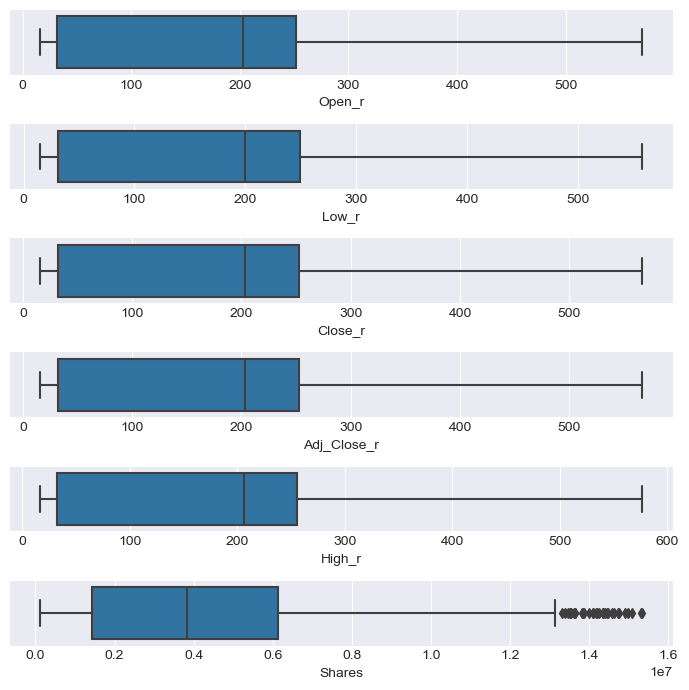

In [36]:
fig, ax = plt.subplots(6,1, dpi=100, figsize=(7,7))

sns.boxplot(x="Open_r", data=tesla_set, ax=ax[0])
sns.boxplot(x="Low_r", data=tesla_set, ax=ax[1])
sns.boxplot(x="Close_r", data=tesla_set, ax=ax[2])
sns.boxplot(x="Adj_Close_r", data=tesla_set, ax=ax[3])
sns.boxplot(x="High_r", data=tesla_set, ax=ax[4])
sns.boxplot(x="Shares", data=tesla_set, ax=ax[5])

plt.tight_layout();

Now by plotting Adjust Close it is possible to graphically see the growth per year, the price has a high variability per year and even after has worked the data, the graph shows some outliers in it, which demonstrate the volatility of the stock market.

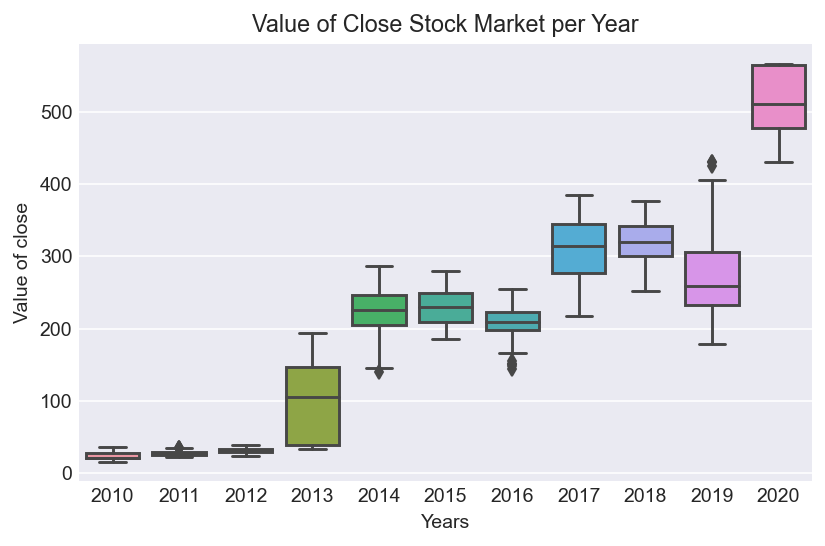

In [37]:
fig, ax = plt.subplots(1,1, dpi=140)

sns.boxplot(x='Year', y="Adj_Close_r", data=tesla_set)
plt.title("Value of Close Stock Market per Year")
plt.xlabel("Years")
plt.ylabel("Value of close")
plt.tight_layout();

The following graph shows how Tesla shares vary over time, the shares of a company have to be at least one but there is no limit, when companies grow it is possible that the number of shares increase, considering both the 'Value of closed stock per year' and 'Stocks over time' it is possible to see the correlation between the increase in price and the increase in the volume of shares that move in the stock market. 

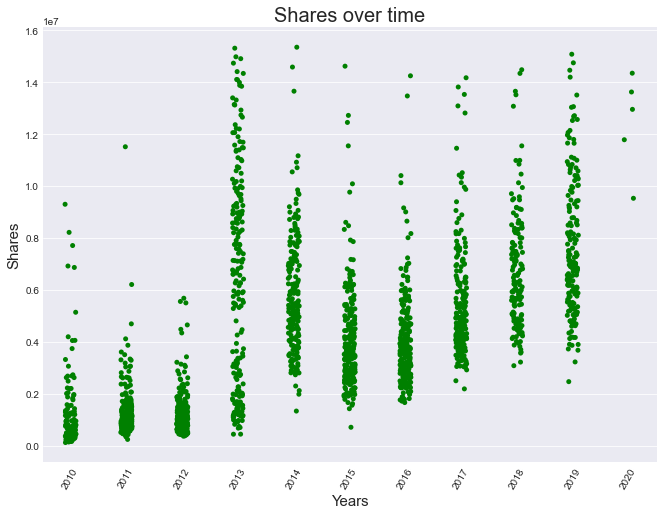

In [38]:
plt.figure(figsize=(11, 8))
sns.stripplot(x='Year', y="Shares", data=tesla_set, color= 'g')
plt.xlabel("Years", size=15)
plt.ylabel("Shares", size=15)
plt.title("Shares over time", size=20)
plt.xticks(rotation=60)
plt.show()

A heatmap graph shows the existing correlation between variables of the dataset, the closest to 1, stronger the correlation. Analysing the graph shows a strong correlation of the Tesla stock prices.

,Shares,Open_r,Low_r,Close_r,Adj_Close_r,High_r,Close and Open variability,Year
Shares,1.000000,0.602894,0.597982,0.602496,0.602496,0.606710,-0.007473,0.577815
Open_r,0.602894,1.000000,0.999823,0.999717,0.999717,0.999853,0.003506,0.892486
Low_r,0.597982,0.999823,1.000000,0.999844,0.999844,0.999825,0.016260,0.892530
Close_r,0.602496,0.999717,0.999844,1.000000,1.000000,0.999856,0.027303,0.892792
Adj_Close_r,0.602496,0.999717,0.999844,1.000000,1.000000,0.999856,0.027303,0.892792
High_r,0.606710,0.999853,0.999825,0.999856,0.999856,1.000000,0.015517,0.892935
Close and Open variability,-0.007473,0.003506,0.016260,0.027303,0.027303,0.015517,1.000000,0.026642
Year,0.577815,0.892486,0.892530,0.892792,0.892792,0.892935,0.026642,1.000000


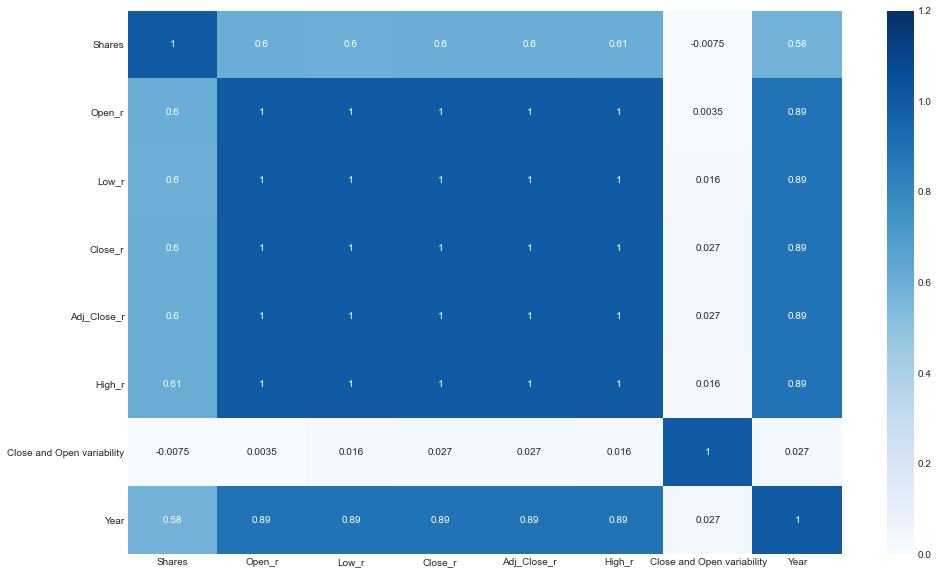

In [39]:
plt.figure(figsize=(16,10))
C = tesla_set.corr()
sns.heatmap(C,cmap="Blues", vmin=0, vmax=1.2, annot=True);
C

By graphically analyzing the behavior between opening and closing of Tesla's share price per day, it can be seen that the company is generating income and growing in a constant and linear way. 

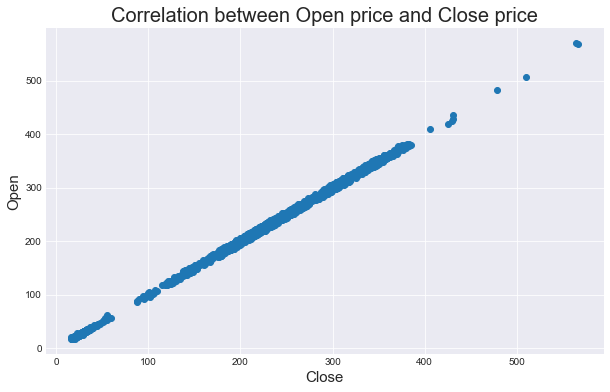

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
X = ax.scatter(tesla_set['Adj_Close_r'], tesla_set['Open_r'])
ax.set_xlabel('Close', size=15)
ax.set_ylabel('Open', size=15)
plt.title("Correlation between Open price and Close price", size=20)
plt.show()

After processing the data, the variables can have different types of scales, for this reason standardizing these data helps to have a better result when working with models, such as PCA and machine learning methods, when standardizing the mean of all the variables is transformed into 0 

In [41]:
features = ['Open_r', 'Close_r', 'Adj_Close_r','Low_r','High_r', 'Shares', 'Year']
x = tesla_set.loc[:, features].values

In [42]:
x = StandardScaler().fit_transform(x)

In [43]:
pd.DataFrame(data = x, columns = features).head()

,Open_r,Close_r,Adj_Close_r,Low_r,High_r,Shares,Year
0,-1.245366,-1.271158,-1.271158,-1.280243,-1.243406,1.226101,-1.602639
1,-1.262653,-1.295005,-1.295005,-1.293903,-1.267484,0.260750,-1.602639
2,-1.288582,-1.321703,-1.321703,-1.319119,-1.293954,0.802243,-1.602639
3,-1.319698,-1.324381,-1.324381,-1.326562,-1.322728,0.819424,-1.602639
4,-1.321945,-1.310039,-1.310039,-1.321396,-1.315129,1.067017,-1.602639


After standardizing the data, it is recommended to verify the correlation between variables again. Now the variables have a stronger correlation, but the most important correlation remains the same.  

,Open_r,Close_r,Adj_Close_r,Low_r,High_r,Shares,Year
Open_r,1.000000,0.999717,0.999717,0.999823,0.999853,0.602894,0.892486
Close_r,0.999717,1.000000,1.000000,0.999844,0.999856,0.602496,0.892792
Adj_Close_r,0.999717,1.000000,1.000000,0.999844,0.999856,0.602496,0.892792
Low_r,0.999823,0.999844,0.999844,1.000000,0.999825,0.597982,0.892530
High_r,0.999853,0.999856,0.999856,0.999825,1.000000,0.606710,0.892935
Shares,0.602894,0.602496,0.602496,0.597982,0.606710,1.000000,0.577815
Year,0.892486,0.892792,0.892792,0.892530,0.892935,0.577815,1.000000


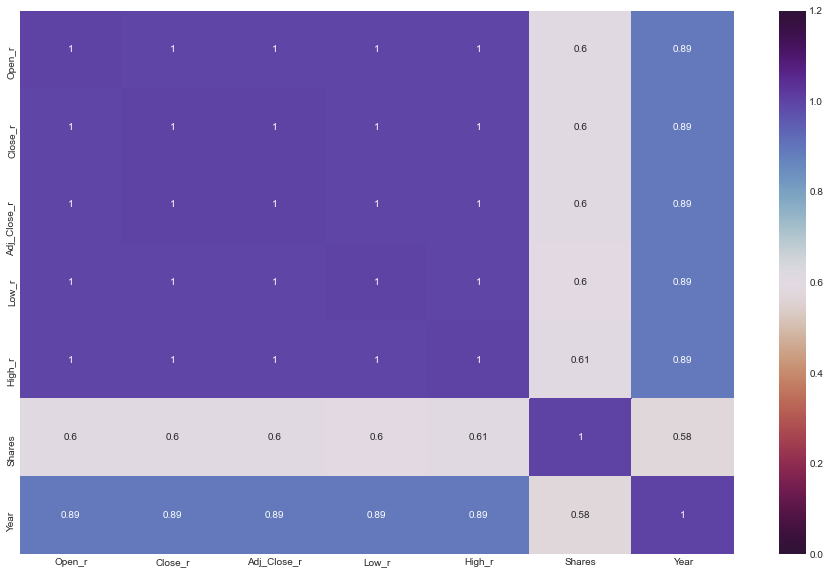

In [44]:
plt.figure(figsize=(16,10))
C = pd.DataFrame(data = x, columns = features).corr()
sns.heatmap(C,cmap="twilight_shifted_r", vmin=0, vmax=1.2, annot=True);
C

PCA is a linear dimensionality reduction, this unsupervised method find a list of principal axes in the data, in this way the algorithms lear specific quantities as 'principal components', 'explained variance' and 'explained variance ratio'.

In [45]:
pca = PCA()
pca.fit(x)
PCA(copy=True, whiten=False)

PCA()

In [46]:
print("pca components: {}".format(str(pca.components_)))
print(' ')
print("pca explained variance: {}".format(pca.explained_variance_))
print(' ')
print("pca explained variance ratio: {}".format(pca.explained_variance_ratio_))

pca components: [[ 3.97788993e-01  3.97809435e-01  3.97809435e-01  3.97593608e-01
   3.97998394e-01  2.69611118e-01  3.68897913e-01]
 [-1.18101411e-01 -1.18846051e-01 -1.18846051e-01 -1.26157897e-01
  -1.11987119e-01  9.61990681e-01 -6.26122124e-02]
 [-1.67327524e-01 -1.65880042e-01 -1.65880042e-01 -1.66106478e-01
  -1.66122546e-01 -4.22928236e-02  9.27357740e-01]
 [-6.97199161e-01  4.87493709e-01  4.87493709e-01 -1.29371444e-01
  -1.47900917e-01  6.07019492e-04 -1.03853664e-03]
 [ 2.22749778e-01  1.09438232e-01  1.09438232e-01 -8.62957986e-01
   4.26202860e-01 -9.12275815e-03  7.03688791e-04]
 [-5.13919585e-01 -2.24678078e-01 -2.24678078e-01  1.92298440e-01
   7.73263153e-01 -3.39094711e-03 -2.98765127e-04]
 [-3.18470189e-15 -7.07106781e-01  7.07106781e-01  9.43017098e-16
  -9.09897175e-17  4.68961814e-17  2.48802259e-16]]
 
pca explained variance: [6.23862505e+00 5.90752614e-01 1.73479922e-01 3.96900442e-04
 1.20812601e-04 8.83364950e-05 2.48697417e-34]
 
pca explained variance ratio

When verifying graphically the quantities of components that will have an accuracy of at least 95% are 2 components or more. 

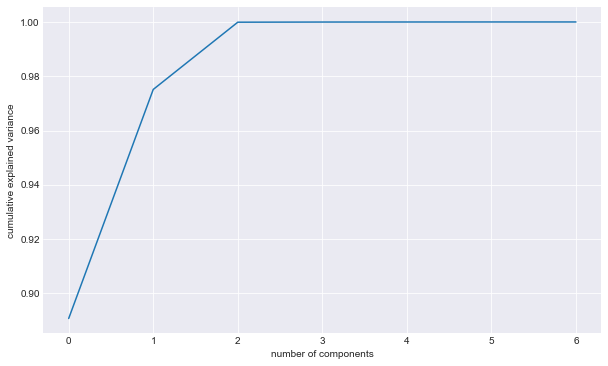

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
pca = PCA().fit(x.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Now applying PCA and after using fit_transform method of dimensionality reduction is possible modify the dataset and this allows us to zeroing out some of the smallest variables in order to preserve the maximal data variance possible.
The original shape was modify from (2022,10) to (2022,7), it is possible see that the  compnents of the data set that are important are 7.

In [48]:
pca = PCA()
principalComponents = pca.fit_transform(x)
pc_tesla = pd.DataFrame(data = principalComponents)
print(' ')
print(pc_tesla.head())
print(' ')
print("Original shape: {}".format(str(tesla_set.shape)))
print("Reduced shape: {}".format(str(principalComponents.shape)))
print(' ')
print("pca components: {}".format(pca.components_))
print("pca explained variance: {}".format(pca.explained_variance_))
print(' ')
print("pca explained variance ratio: {}".format(pca.explained_variance_ratio_))

 
          0         1         2         3         4         5             6
0 -2.771280  2.029825 -0.488757 -0.019158  0.006908 -0.000127 -1.980454e-17
1 -3.072413  1.113295 -0.430857 -0.025614  0.008170  0.001501  6.948862e-16
2 -2.978537  1.649760 -0.431976 -0.026060  0.002090 -0.000330 -1.729418e-18
3 -3.002824  1.674761 -0.420591 -0.001749 -0.011425 -0.006875 -2.210889e-19
4 -2.920475  1.908297 -0.437565  0.012160 -0.012264 -0.006135 -3.459347e-18
 
Original shape: (2022, 10)
Reduced shape: (2022, 7)
 
pca components: [[ 3.97788993e-01  3.97809435e-01  3.97809435e-01  3.97593608e-01
   3.97998394e-01  2.69611118e-01  3.68897913e-01]
 [-1.18101411e-01 -1.18846051e-01 -1.18846051e-01 -1.26157897e-01
  -1.11987119e-01  9.61990681e-01 -6.26122124e-02]
 [-1.67327524e-01 -1.65880042e-01 -1.65880042e-01 -1.66106478e-01
  -1.66122546e-01 -4.22928236e-02  9.27357740e-01]
 [-6.97199161e-01  4.87493709e-01  4.87493709e-01 -1.29371444e-01
  -1.47900917e-01  6.07019492e-04 -1.03853664e-03]
 [

Now it is necessary to verify the behavior of PCA with different quantities of components to find the components that are necessary to obtain the requested precision.

In [49]:
pca1 = PCA(n_components=1)
principalComponents1 = pca1.fit_transform(x)
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(x)
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(x)
pca4 = PCA(n_components=4)
principalComponents4 = pca4.fit_transform(x)

In [50]:
pc_tesla1 = pd.DataFrame(data = principalComponents1, columns = ['pc1'])
pc_tesla2 = pd.DataFrame(data = principalComponents2, columns = ['pc1', 'pc2'])
pc_tesla3 = pd.DataFrame(data = principalComponents3, columns = ['pc1', 'pc2', 'pc3'])
pc_tesla4 = pd.DataFrame(data = principalComponents4, columns = ['pc1', 'pc2', 'pc3','pc4'])

In [51]:
print(pc_tesla1.head())
print(pc_tesla2.head())
print(pc_tesla3.head())
print(pc_tesla4.head())

        pc1
0 -2.771280
1 -3.072413
2 -2.978537
3 -3.002824
4 -2.920475
        pc1       pc2
0 -2.771280  2.029825
1 -3.072413  1.113295
2 -2.978537  1.649760
3 -3.002824  1.674761
4 -2.920475  1.908297
        pc1       pc2       pc3
0 -2.771280  2.029825 -0.488757
1 -3.072413  1.113295 -0.430857
2 -2.978537  1.649760 -0.431976
3 -3.002824  1.674761 -0.420591
4 -2.920475  1.908297 -0.437565
        pc1       pc2       pc3       pc4
0 -2.771280  2.029825 -0.488757 -0.019158
1 -3.072413  1.113295 -0.430857 -0.025614
2 -2.978537  1.649760 -0.431976 -0.026060
3 -3.002824  1.674761 -0.420591 -0.001749
4 -2.920475  1.908297 -0.437565  0.012160


In [52]:
print("Original shape: {}".format(str(tesla_set.shape)))
print("Reduced shape: {}".format(str(principalComponents1.shape)))

print("Reduced shape: {}".format(str(principalComponents2.shape)))

print("Reduced shape: {}".format(str(principalComponents3.shape)))

print("Reduced shape: {}".format(str(principalComponents4.shape)))

Original shape: (2022, 10)
Reduced shape: (2022, 1)
Reduced shape: (2022, 2)
Reduced shape: (2022, 3)
Reduced shape: (2022, 4)


In [53]:
print("pca1 components: {}".format(pca1.components_))
print("pca1 explained variance: {}".format(pca1.explained_variance_))
print(' ')
print("pca2 components: {}".format(pca2.components_))
print("pca2 explained variance: {}".format(pca2.explained_variance_))
print(' ')
print("pca3 components: {}".format(pca3.components_))
print("pca3 explained variance: {}".format(pca3.explained_variance_))
print(' ')
print("pca4 components: {}".format(pca4.components_))
print("pca4 explained variance: {}".format(pca4.explained_variance_))

pca1 components: [[0.39778899 0.39780943 0.39780943 0.39759361 0.39799839 0.26961112
  0.36889791]]
pca1 explained variance: [6.23862505]
 
pca2 components: [[ 0.39778899  0.39780943  0.39780943  0.39759361  0.39799839  0.26961112
   0.36889791]
 [-0.11810141 -0.11884605 -0.11884605 -0.1261579  -0.11198712  0.96199068
  -0.06261221]]
pca2 explained variance: [6.23862505 0.59075261]
 
pca3 components: [[ 0.39778899  0.39780943  0.39780943  0.39759361  0.39799839  0.26961112
   0.36889791]
 [-0.11810141 -0.11884605 -0.11884605 -0.1261579  -0.11198712  0.96199068
  -0.06261221]
 [-0.16732752 -0.16588004 -0.16588004 -0.16610648 -0.16612255 -0.04229282
   0.92735774]]
pca3 explained variance: [6.23862505 0.59075261 0.17347992]
 
pca4 components: [[ 3.97788993e-01  3.97809435e-01  3.97809435e-01  3.97593608e-01
   3.97998394e-01  2.69611118e-01  3.68897913e-01]
 [-1.18101411e-01 -1.18846051e-01 -1.18846051e-01 -1.26157897e-01
  -1.11987119e-01  9.61990681e-01 -6.26122124e-02]
 [-1.67327524e-

When printing the variance ratio results, the number of components required to obtain an accuracy of 95% or more is 2.

In [54]:
print("pca1 explained variance ratio: {}".format(pca1.explained_variance_ratio_))
print(' ')
print("pca2 explained variance ratio: {}".format(pca2.explained_variance_ratio_))
print(' ')
print("pca3 explained variance ratio: {}".format(pca3.explained_variance_ratio_))
print(' ')
print("pca4 explained variance ratio: {}".format(pca4.explained_variance_ratio_))

pca1 explained variance ratio: [0.89079138]
 
pca2 explained variance ratio: [0.89079138 0.08435149]
 
pca3 explained variance ratio: [0.89079138 0.08435149 0.02477059]
 
pca4 explained variance ratio: [8.90791382e-01 8.43514931e-02 2.47705894e-02 5.66720216e-05]


Now two columns must be created with the .concat() function using the components found that meet the accuracy requirements, this in order to be represented graphically. 

In [55]:
plot_pca_tesla = pd.concat([pc_tesla2,], axis = 1)
plot_pca_tesla.head(5)

,pc1,pc2
0,-2.771280,2.029825
1,-3.072413,1.113295
2,-2.978537,1.649760
3,-3.002824,1.674761
4,-2.920475,1.908297


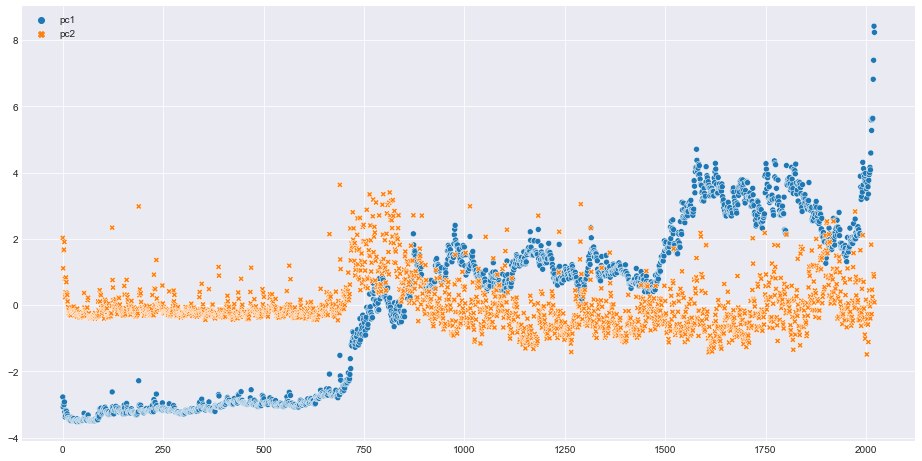

In [56]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(data = plot_pca_tesla)

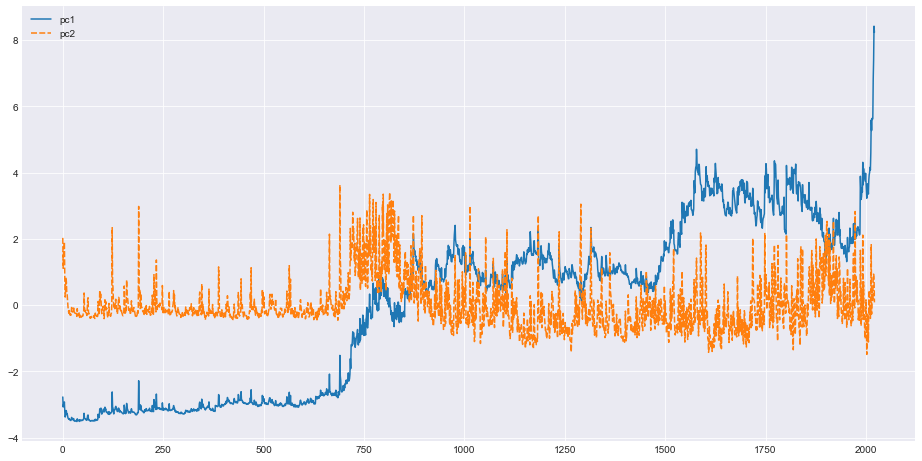

In [57]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=plot_pca_tesla)

## Conclusion

When working with this dataset it is possible to realize that normally they have to be modified in order to have a better understanding of them, contemplating missing values, disorganization and format errors among others. To improve the organization of the dataset you can use different analysis methods that will be much more successful compared to doing it with a dataset without working.
Applying PCA shows us the close relationship that exists between some of the variables reducing them to a smaller dimension, this shows trends, clusters and outliers among others. Considering Tesla dataset, a strong growth trend is seen between the variables pc1 and pc2, this means that market actions and market values are strongly related.

## Curse of Dimensionality

When you are working on machine learning in most cases the amount of data is huge, this means that the dimensions are too.
When planning to analyze data, the dimensionality of these must be considered, if the data is too large and the relationships between the variables are not clear, it is not possible to analyze it without the help of machine learning.
Having a certain amount of data it is possible to modify the amount of features, but this can cause ML to work in an inappropriate way, there are a number of features that produce the best accuracy in the model, considering this is where underfitting and overfitting appear, since when overfitting ML, it loses the ability to generalize and when underfitting, the model cannot find the correct pattern. In order to work properly with ML a balance must be found between these.


## References

Holtz, Y., 2018. Basic Lollipop Plot. [Online] 
Available at: https://www.python-graph-gallery.com/180-basic-lollipop-plot
[Accessed 04 may 2021].

Sharma, N., 2018. Ways to Detect and Remove the Outliers. [Online] 
Available at: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
[Accessed 03 may 2021].

Holtz, Y., 2018. Lollipop plot with conditional color. [Online] 
Available at: https://www.python-graph-gallery.com/185-lollipop-plot-with-conditional-color
[Accessed 04 may 2021].

Tesla, 2021. Tesla’s mission is to accelerate the world’s transition to sustainable energy.. [En línea] 
Available at: https://www.tesla.com/en_IE/about?redirect=no
[Último acceso: 07 may 2021].
